<a href="https://colab.research.google.com/github/Praveen5612/ML_Algorithams/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/sample_data/bank loan 2.csv')

In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=614, step=1)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
df = data.dropna()

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


<Axes: >

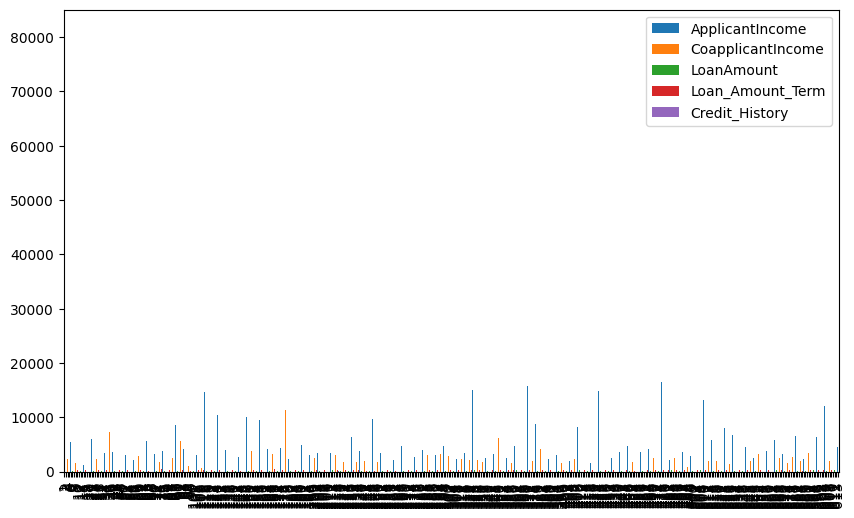

In [ ]:
df.plot(kind='bar',figsize=(10,6))

<Axes: xlabel='LoanAmount'>

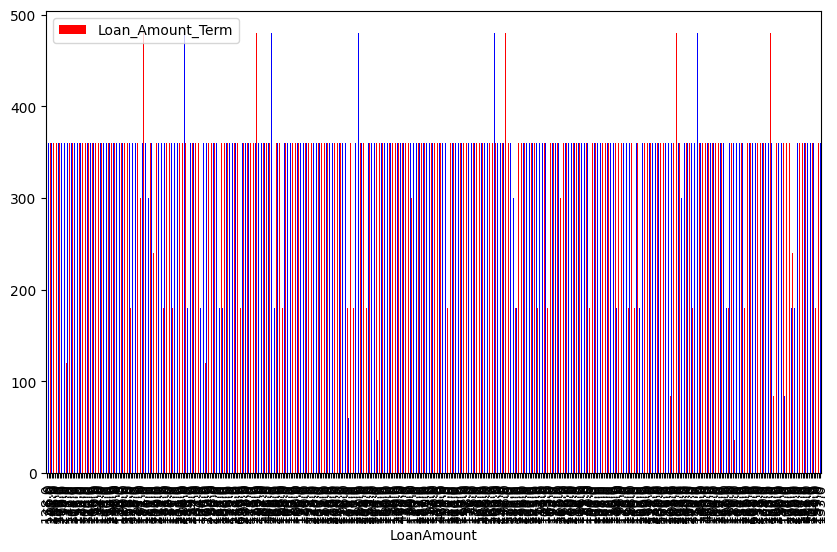

In [ ]:
df.plot(x = 'LoanAmount', y = 'Loan_Amount_Term', kind='bar',figsize=(10,6),color=['red','blue'])

In [ ]:
a = df.describe()

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

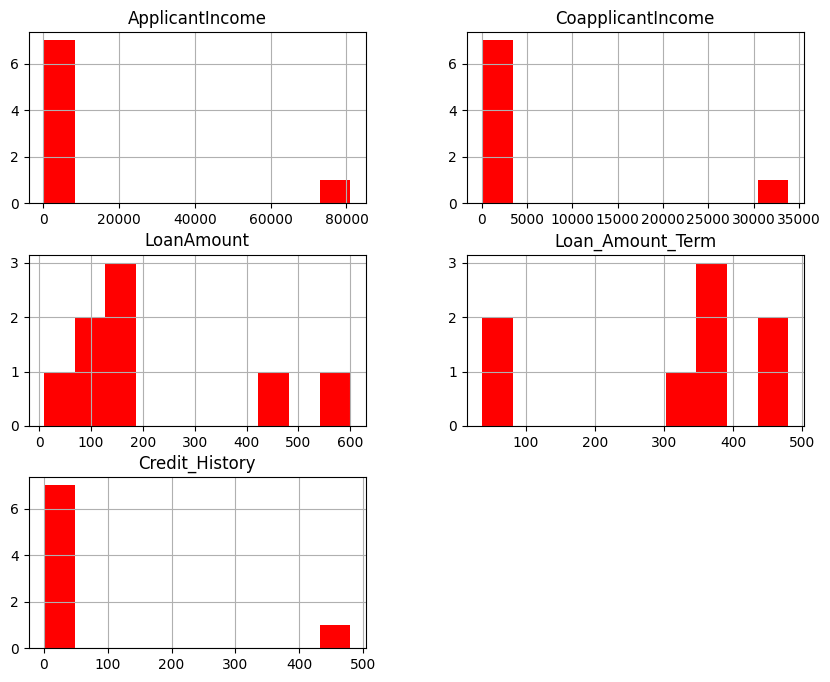

In [ ]:
a.hist(figsize=(10,8),color='red')

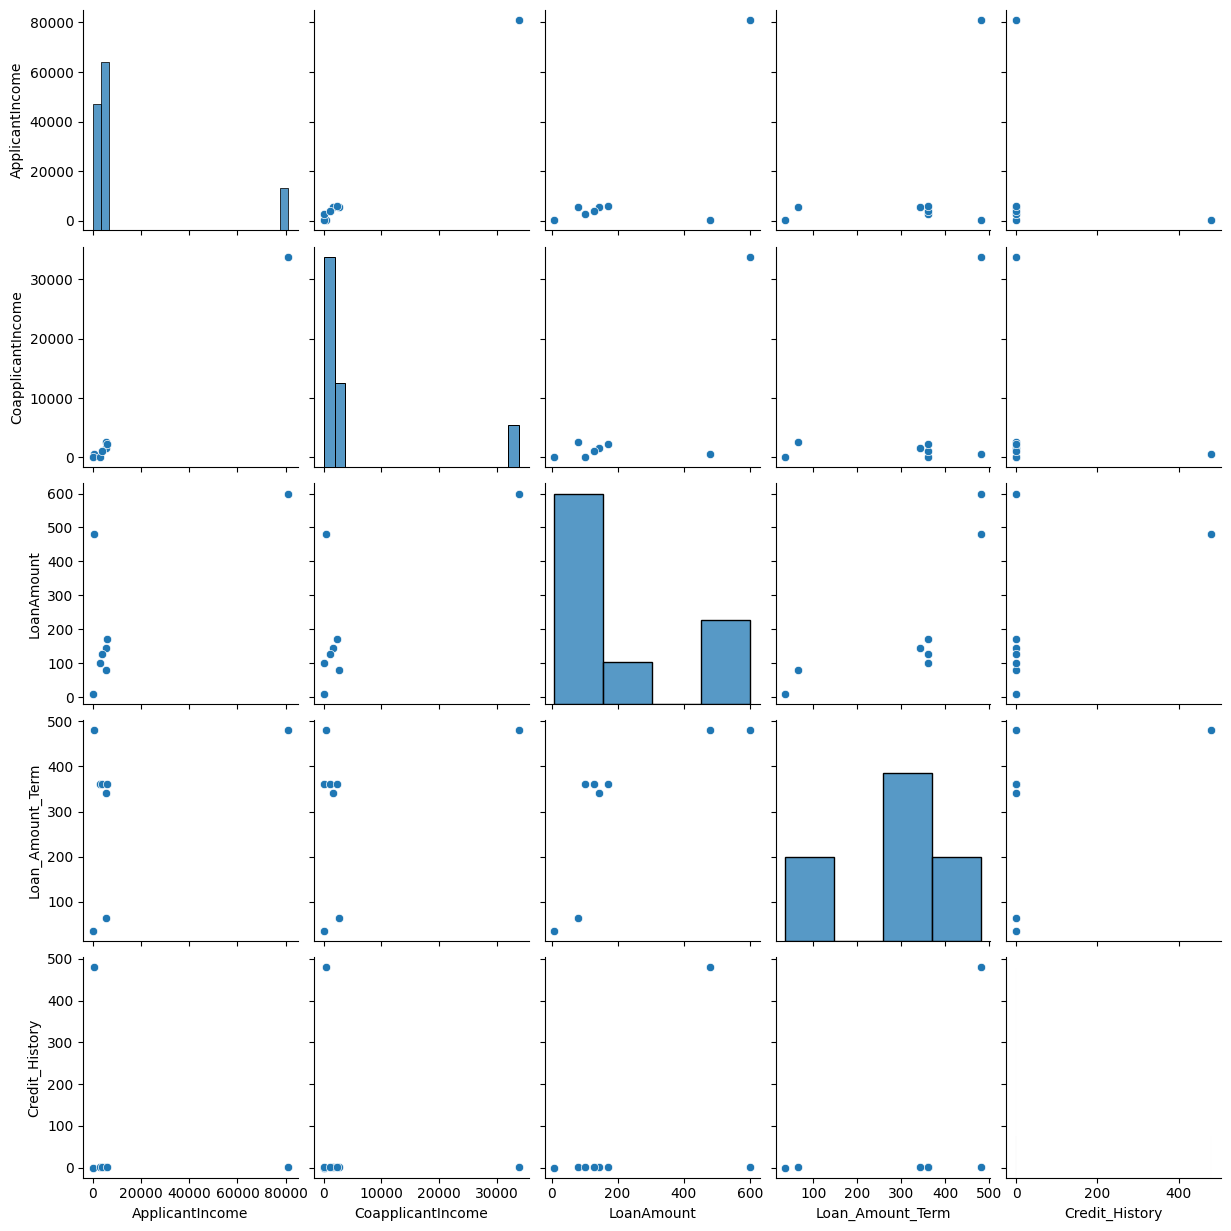

In [ ]:
sns.pairplot(a)

<Axes: >

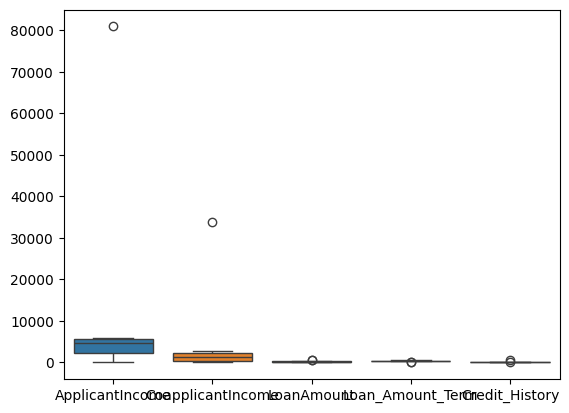

In [ ]:
sns.boxplot(data=a)

In [ ]:
from scipy import stats
z_score = np.abs(stats.zscore(a.dropna()))

# print((z_score > 3).sum())
print((z_score > 2.5).sum())
# print((z_score > 2).sum())
b = a[(z_score<2.5).all(axis=1)]

3


<Axes: >

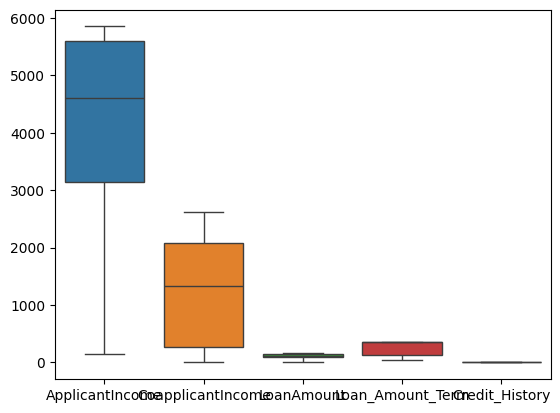

In [ ]:
sns.boxplot(data=b)

In [ ]:
y = df['Loan_Status']
x = df.drop(['Loan_Status', 'Loan_ID','Education','Dependents','Gender','Property_Area'], axis=1)
print(x.head())
print(y.head())

  Married Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
1     Yes            No             4583             1508.0       128.0   
2     Yes           Yes             3000                0.0        66.0   
3     Yes            No             2583             2358.0       120.0   
4      No            No             6000                0.0       141.0   
5     Yes           Yes             5417             4196.0       267.0   

   Loan_Amount_Term  Credit_History  
1             360.0             1.0  
2             360.0             1.0  
3             360.0             1.0  
4             360.0             1.0  
5             360.0             1.0  
1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Married','Self_Employed']:
    x[col] = le.fit_transform(x[col])

In [ ]:
print(x.head())
print(y.head())

   Married  Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  \
1        1              0             4583             1508.0       128.0   
2        1              1             3000                0.0        66.0   
3        1              0             2583             2358.0       120.0   
4        0              0             6000                0.0       141.0   
5        1              1             5417             4196.0       267.0   

   Loan_Amount_Term  Credit_History  
1             360.0             1.0  
2             360.0             1.0  
3             360.0             1.0  
4             360.0             1.0  
5             360.0             1.0  
1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape )

(384, 7)
(96, 7)
(384,)
(96,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=2, criterion='entropy')
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=2)

In [ ]:
y_pred = model.predict(x_test)
print(y_pred[:5])

['Y' 'Y' 'Y' 'N' 'Y']


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')
print(accuracy)
print(precision)
print(recall)
print(f1)

0.8229166666666666
0.8229166666666666
0.8229166666666666
0.8229166666666666


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11 17]
 [ 0 68]]


In [ ]:
train_acc = dt.score(x_train, y_train)
test_acc = dt.score(x_test, y_test)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.69
Test Accuracy: 0.71


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy: 0.7918318523581681


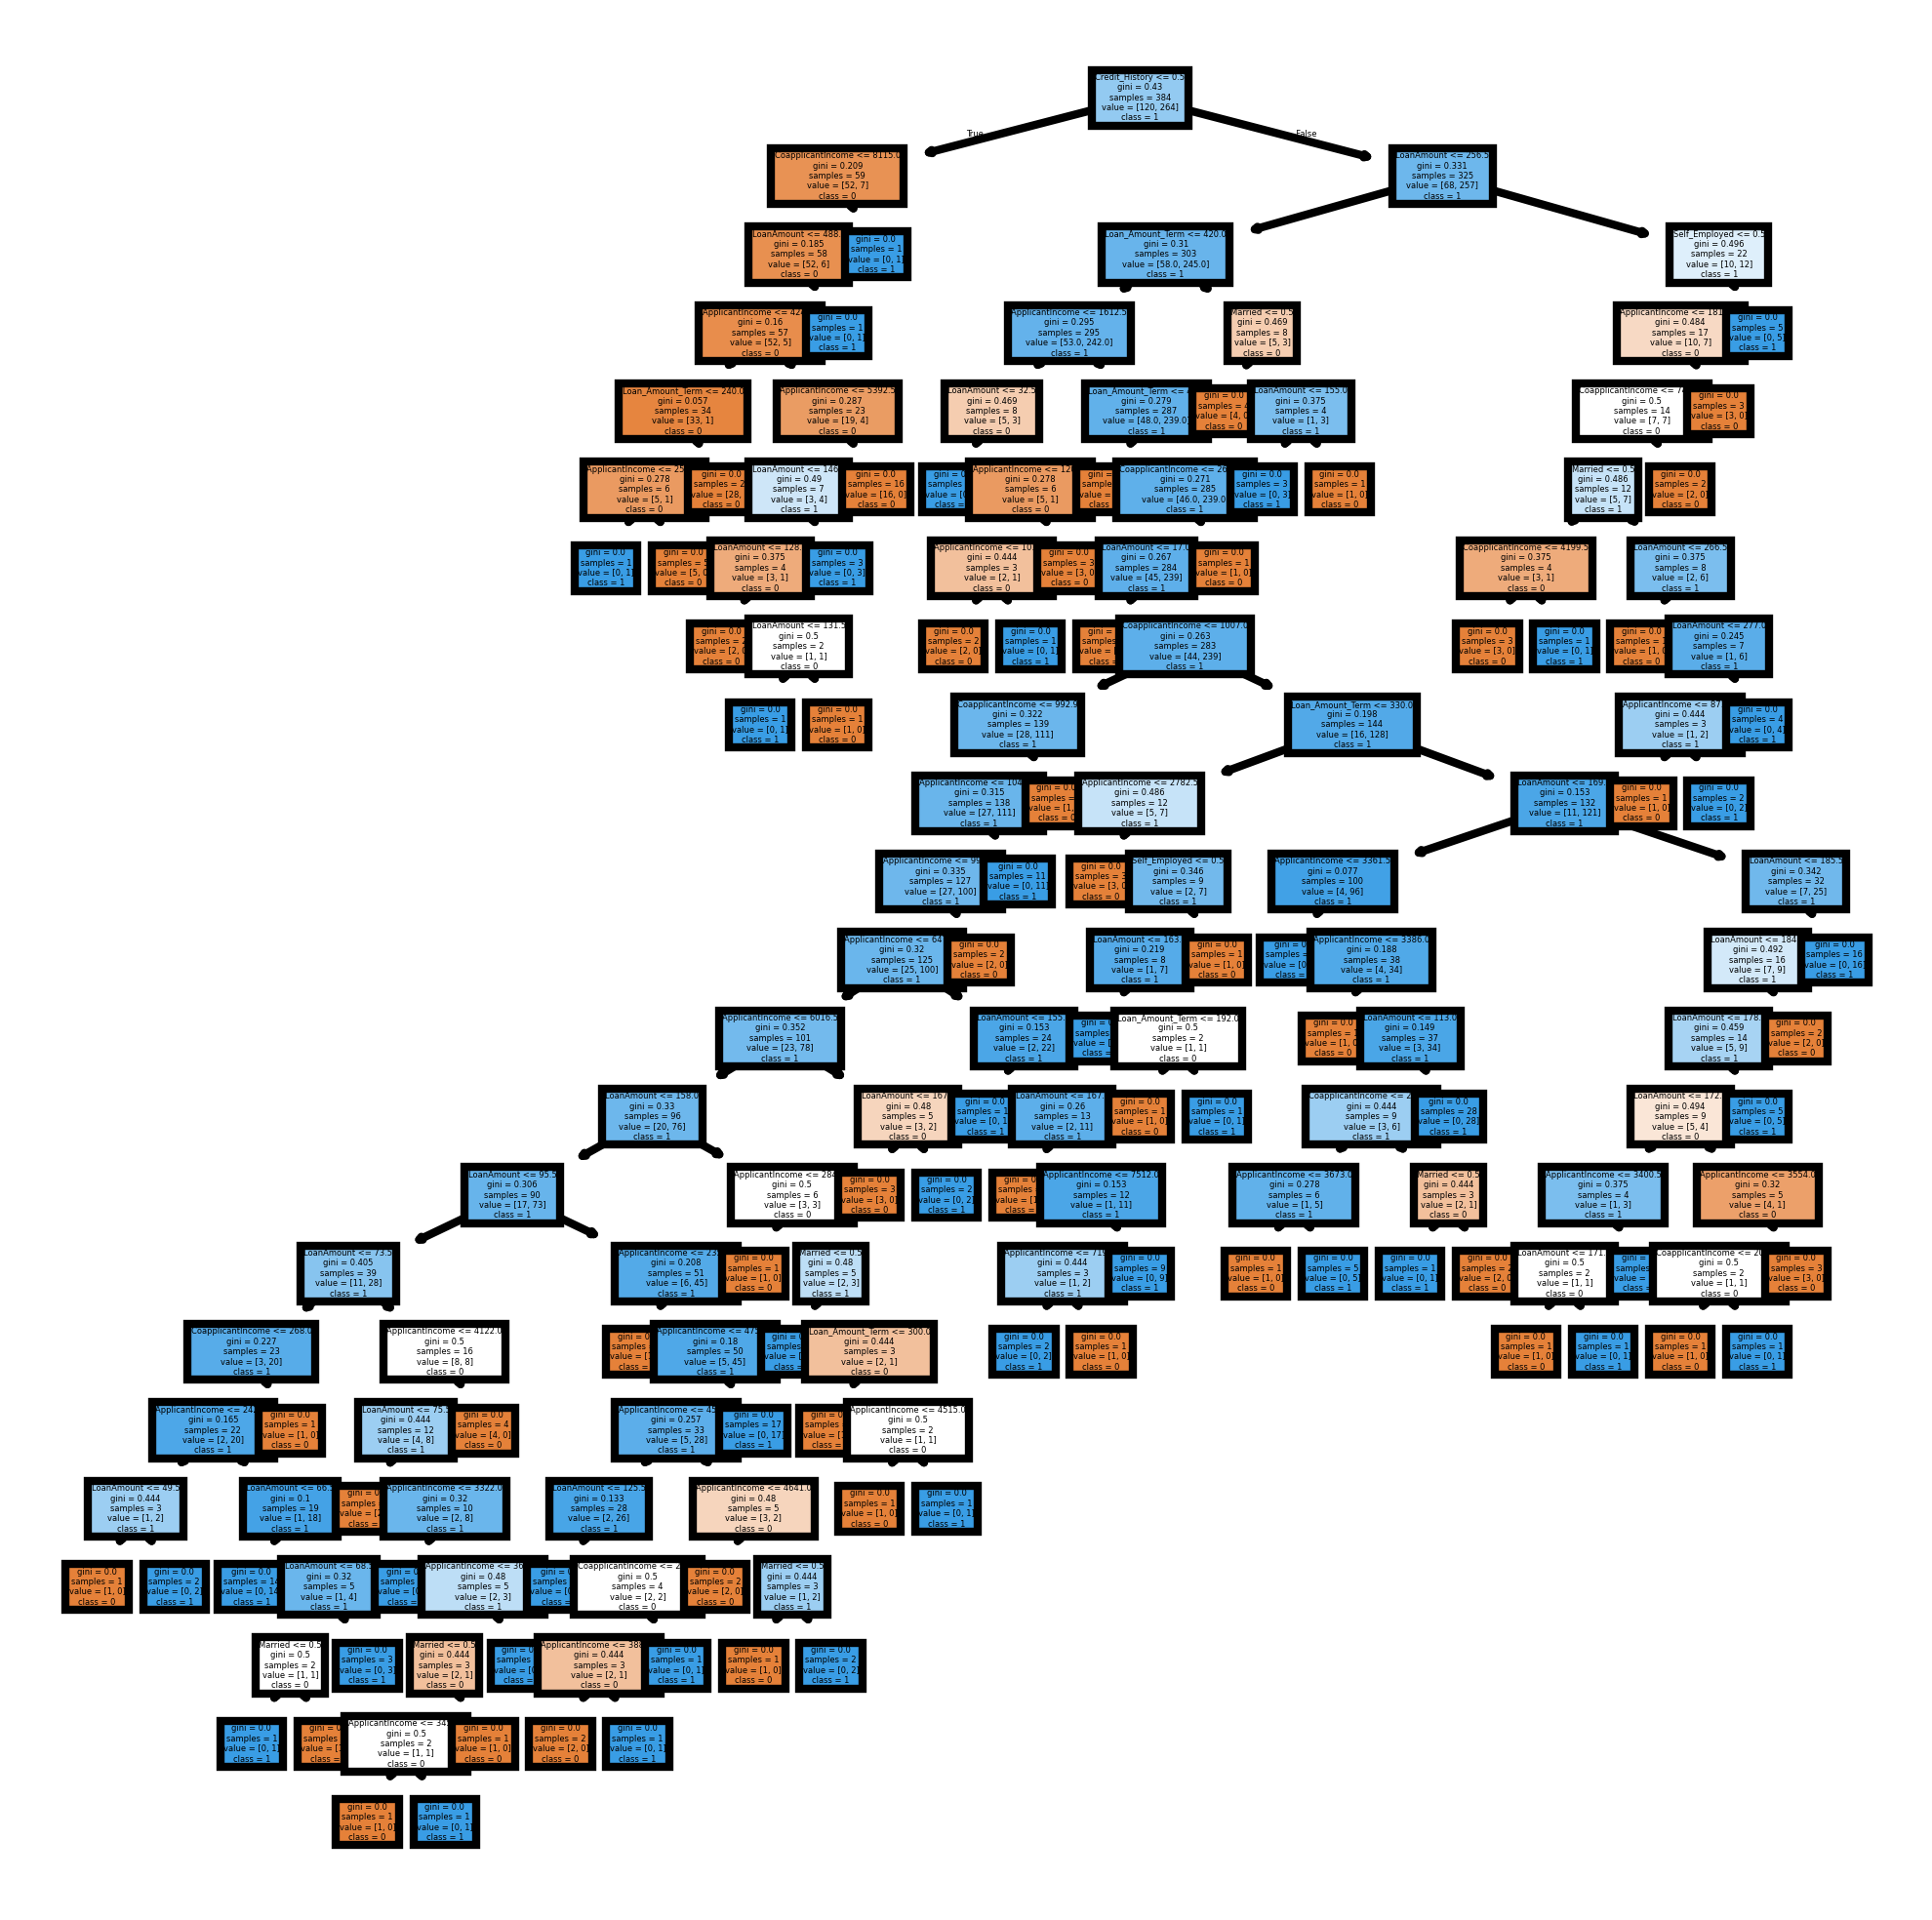

In [ ]:
from sklearn import tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(dt,
               feature_names = x.columns,
               class_names=['0','1'],
               filled = True);

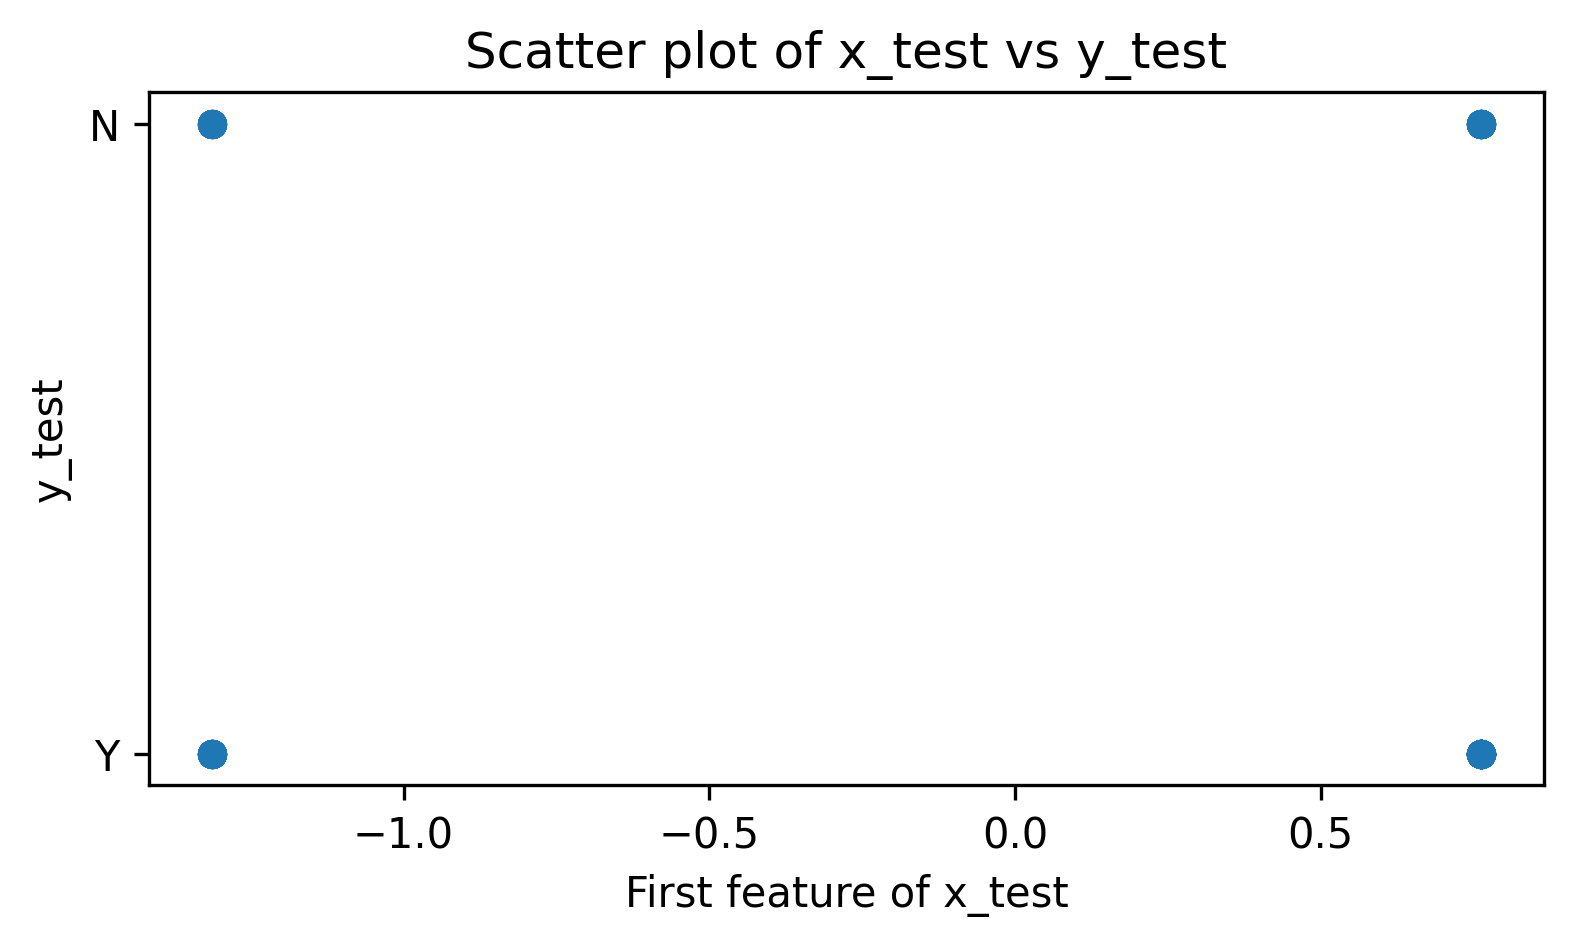

In [ ]:
figure = plt.figure(figsize=(6,3),dpi=300)
plt.scatter(x_test[:, 0], y_test) # Assuming you want to plot the first feature of x_test against y_test
plt.xlabel('First feature of x_test')
plt.ylabel('y_test')
plt.title('Scatter plot of x_test vs y_test')
plt.show()

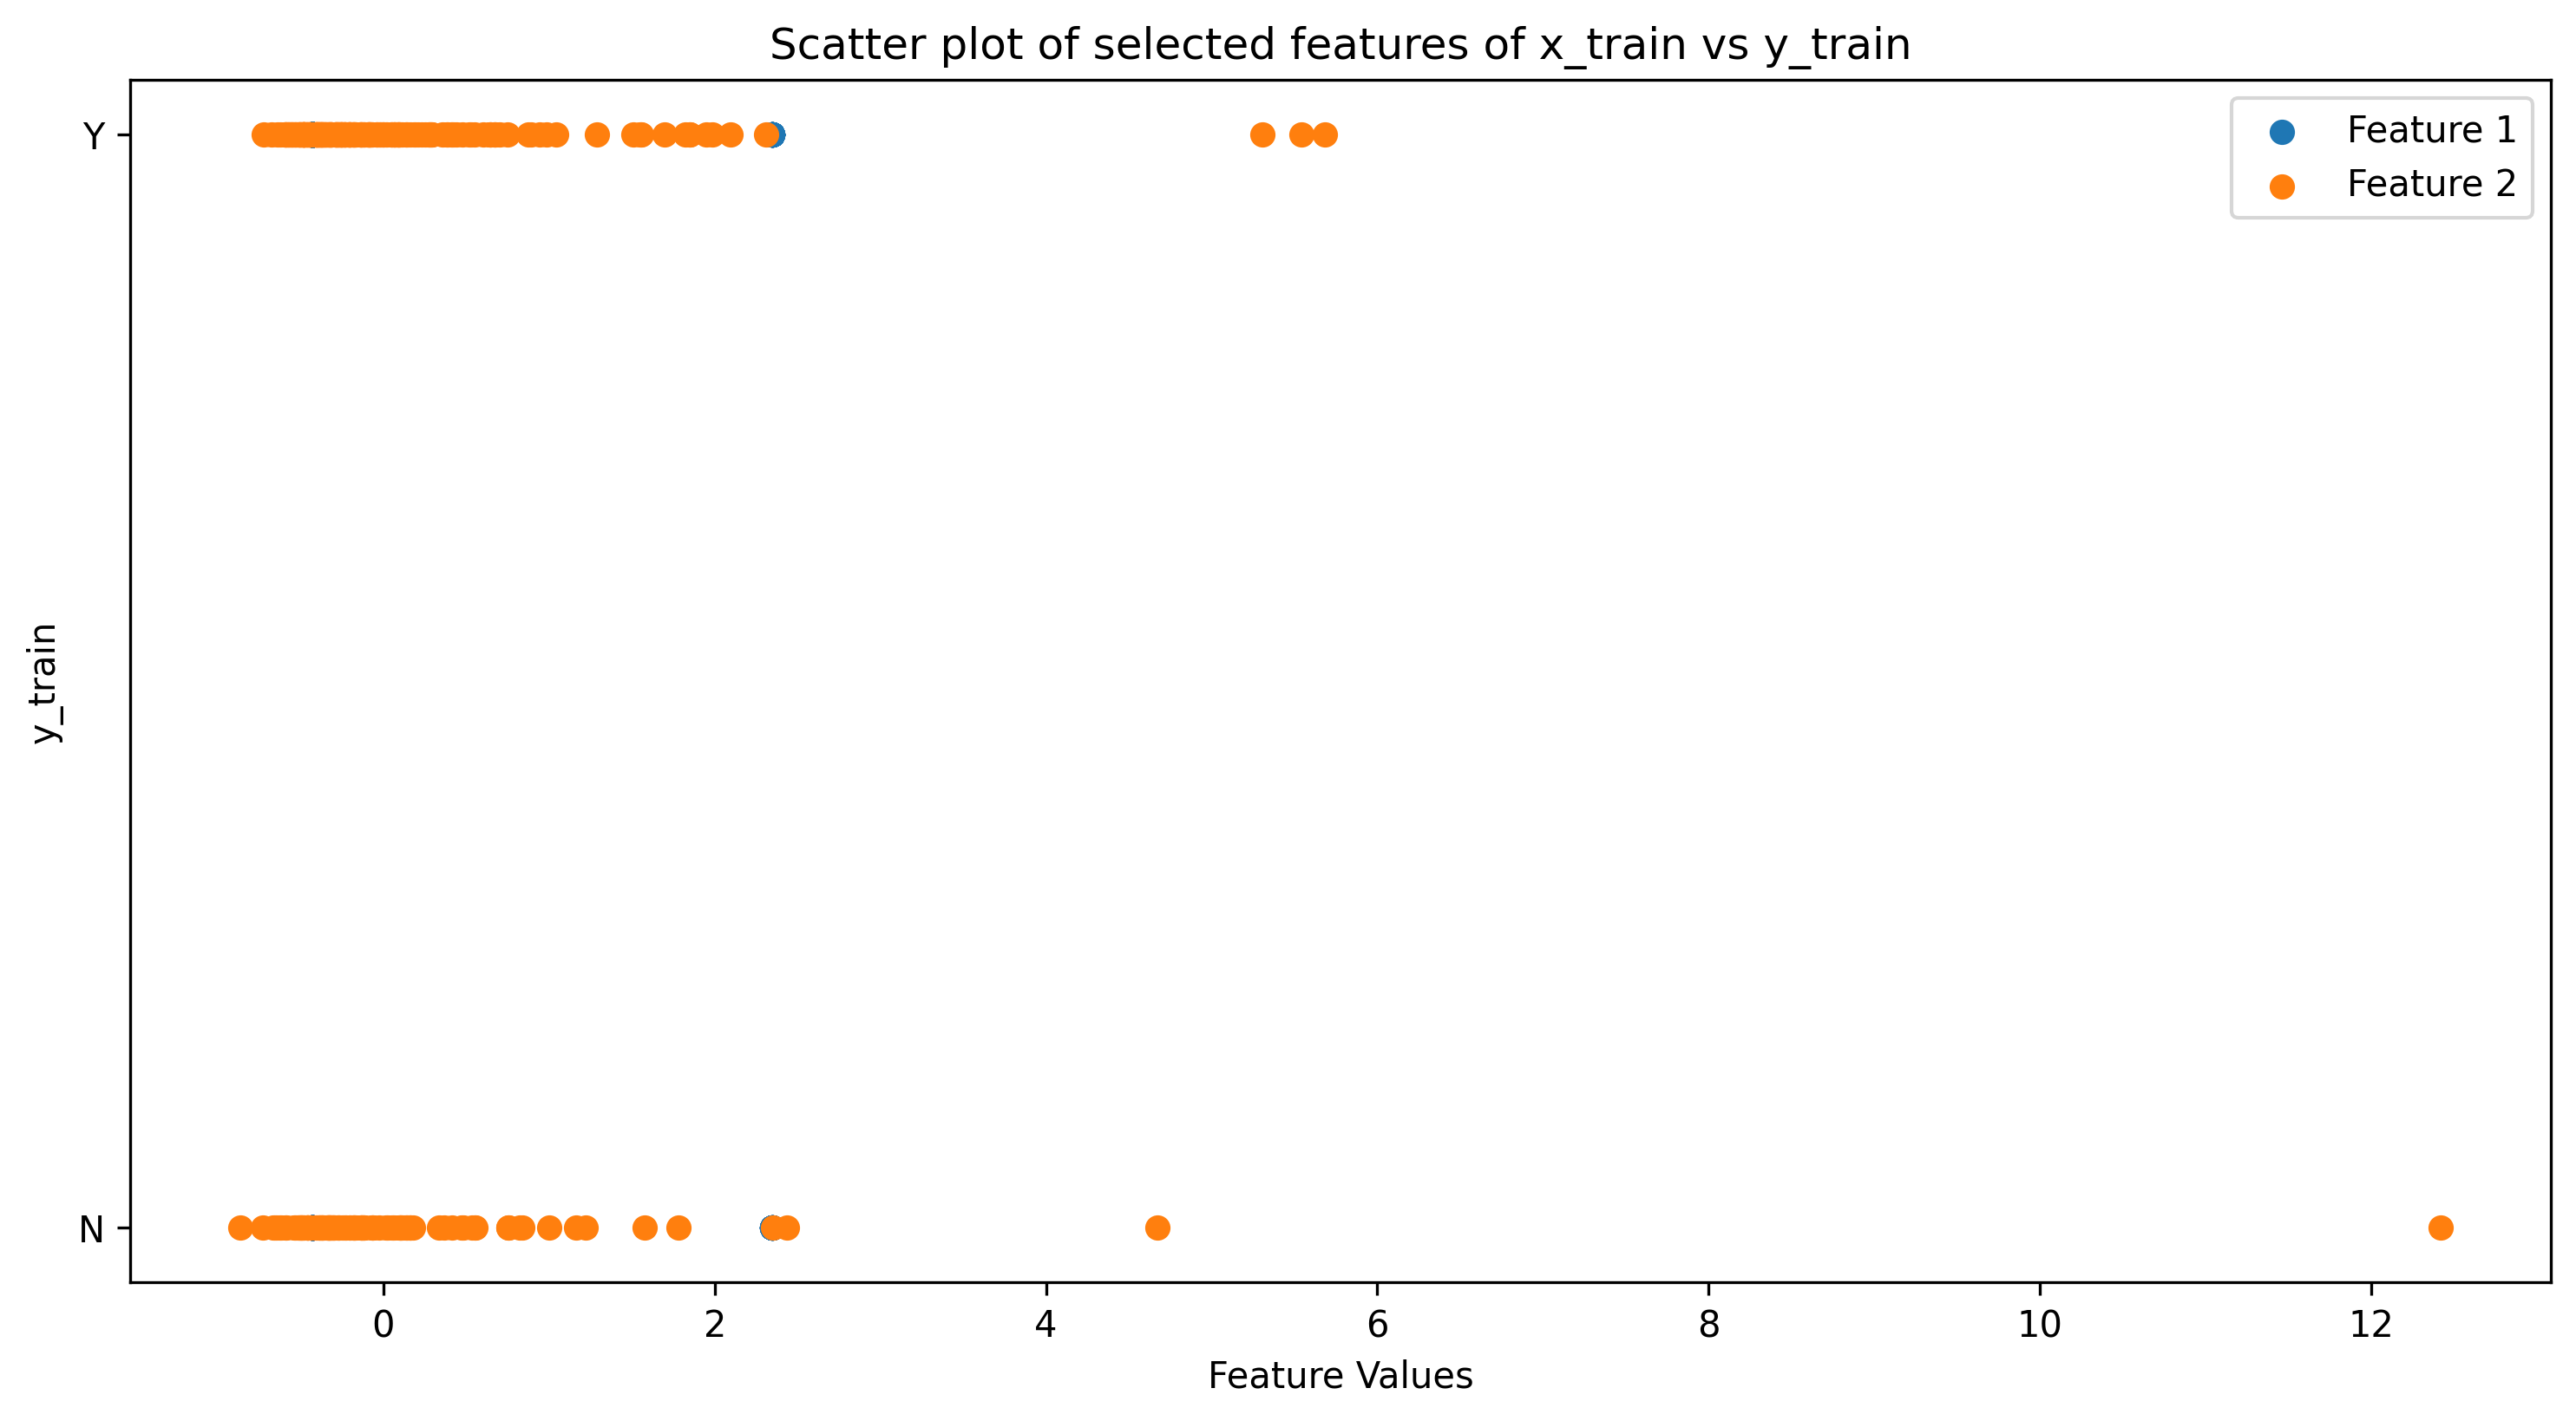

In [ ]:
figure = plt.figure(figsize=(12, 6), dpi=300)

plt.scatter(x_train[:, 1], y_train, label='Feature 1')
plt.scatter(x_train[:, 2], y_train, label='Feature 2')

plt.xlabel('Feature Values')
plt.ylabel('y_train')
plt.title('Scatter plot of selected features of x_train vs y_train')
plt.legend()
plt.show()